In [3]:
import numpy as np
import pandas as pd
import itertools
from itertools import cycle

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, roc_auc_score, auc, f1_score, accuracy_score, confusion_matrix
# from xgboost import plot_importance
from scipy import interp


%matplotlib inline

In [7]:
data = pd.read_csv('genres_v2.csv')
data = data[~data["genre"].isin(["Pop", "Rap", "RnB", "Hiphop", "Underground Rap", "trap"])]
# data = data[data["genre"].isin(["Dark Trap", "Trap Metal", "Underground Rap", "Emo", 'dnb', 'hardstyle', 'psytrance',
#        'techhouse', 'techno', 'trance', 'trap'])]
features = data.columns[:11]
genres = np.unique(data.genre)

# Construct train and test datasets

In [8]:
X = data[features].copy()
y = LabelEncoder().fit_transform(data['genre'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, random_state=123, shuffle=True)

In [10]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [11]:
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

In [12]:
def display_results(y_test, pred_probs, cm = True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(genres))
    print('Test Set Accuracy =  {0:.2f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.2f}'.format(f1_score(y_test, pred, average='macro')))
    print('ROC AUC = {0:.3f}'.format(roc_auc_score(y_true=one_hot_true, y_score=pred_probs, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=genres)

# Random Forest Classifier

In [13]:
# Train random forest model with optimal parameters
# rf = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=1200)
rf = RandomForestClassifier(n_estimators = 400, random_state = 21)

In [14]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400, random_state=21)

In [15]:

# Genre prediction 
rf_probs = rf.predict_proba(X_test)



Test Set Accuracy =  0.83
Test Set F-score =  0.81
ROC AUC = 0.975
Confusion matrix, without normalization
[[646  29 108   8  21  31   8  20  45]
 [ 45 254  14   5  13   0   1   0   4]
 [198  25 139   4  10   0   6   0   9]
 [  7   2   5 580   0   0   0   0   0]
 [  9   4   1   0 567   6   0   0   0]
 [ 14   0   1   0   3 533   0  12  29]
 [  7   2   2   0   0   0 551  32   1]
 [ 10   0   1   0   0  16  44 493  27]
 [ 11   5   3   0   0   9   5  28 539]]


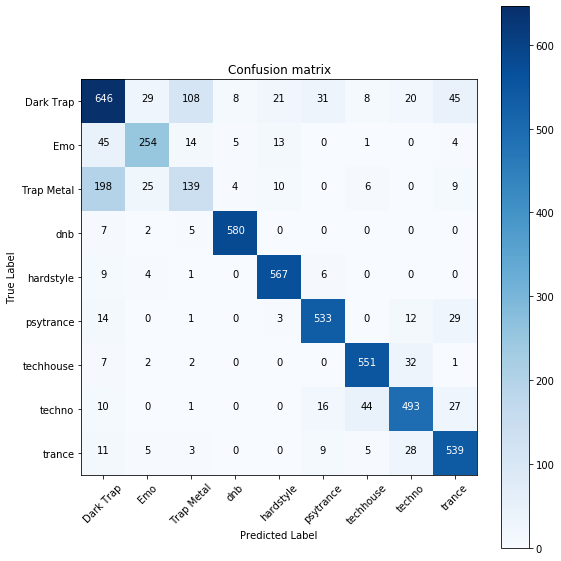

In [16]:
# Display results
display_results(y_test, rf_probs, cm=True)

# Predict genres of Corpse's music

In [17]:
corpse = pd.read_csv('corpse.csv')
corpse

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artist,song_name
0,0.614,0.937,1,-7.443,1,0.115,0.00161,0.001360,0.103,0.386,84.980,audio_features,7bCfHiRcfUjG0YVVNUL7Ve,spotify:track:7bCfHiRcfUjG0YVVNUL7Ve,https://api.spotify.com/v1/tracks/7bCfHiRcfUjG...,https://api.spotify.com/v1/audio-analysis/7bCf...,105176,4,CORPSE,E-GIRLS ARE RUINING MY LIFE!
1,0.792,0.829,2,-6.612,1,0.256,0.00103,0.075500,0.582,0.170,93.044,audio_features,3pXVmZh293nWtqxildz9jf,spotify:track:3pXVmZh293nWtqxildz9jf,https://api.spotify.com/v1/tracks/3pXVmZh293nW...,https://api.spotify.com/v1/audio-analysis/3pXV...,92856,4,CORPSE,Miss YOU!
2,0.644,0.883,1,-6.985,1,0.473,0.01190,0.000000,0.377,0.522,164.158,audio_features,4SPBwOTXgku4QvmRtMEGfW,spotify:track:4SPBwOTXgku4QvmRtMEGfW,https://api.spotify.com/v1/tracks/4SPBwOTXgku4...,https://api.spotify.com/v1/audio-analysis/4SPB...,97317,4,CORPSE,Cat Girls Are Ruining My Life!
3,0.904,0.854,5,-3.528,0,0.179,0.01750,0.000097,0.296,0.351,130.074,audio_features,3qdRwIwWa5nVZnNp43uYrx,spotify:track:3qdRwIwWa5nVZnNp43uYrx,https://api.spotify.com/v1/tracks/3qdRwIwWa5nV...,https://api.spotify.com/v1/audio-analysis/3qdR...,121846,4,CORPSE,White Tee
4,0.561,0.964,1,-6.593,1,0.522,0.01180,0.000004,0.875,0.452,160.088,audio_features,04bEhujOxzNrXeideMtFuR,spotify:track:04bEhujOxzNrXeideMtFuR,https://api.spotify.com/v1/tracks/04bEhujOxzNr...,https://api.spotify.com/v1/audio-analysis/04bE...,119432,4,CORPSE,Never Satisfied
5,0.726,0.732,8,-5.596,1,0.189,0.01290,0.000174,0.681,0.127,144.065,audio_features,5cCpq6EJqI8dgz8FwE7gk3,spotify:track:5cCpq6EJqI8dgz8FwE7gk3,https://api.spotify.com/v1/tracks/5cCpq6EJqI8d...,https://api.spotify.com/v1/audio-analysis/5cCp...,86667,4,CORPSE,Cabin Fever
6,0.892,0.834,1,-3.413,1,0.194,0.00455,0.001720,0.319,0.388,130.042,audio_features,3AQdBQPDyHQpEauct5Fiu6,spotify:track:3AQdBQPDyHQpEauct5Fiu6,https://api.spotify.com/v1/tracks/3AQdBQPDyHQp...,https://api.spotify.com/v1/audio-analysis/3AQd...,121846,4,CORPSE,White Tee - Alternate Bass Boosted Version


In [18]:
corpse[features]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.614,0.937,1,-7.443,1,0.115,0.00161,0.001360,0.103,0.386,84.980
1,0.792,0.829,2,-6.612,1,0.256,0.00103,0.075500,0.582,0.170,93.044
2,0.644,0.883,1,-6.985,1,0.473,0.01190,0.000000,0.377,0.522,164.158
3,0.904,0.854,5,-3.528,0,0.179,0.01750,0.000097,0.296,0.351,130.074
4,0.561,0.964,1,-6.593,1,0.522,0.01180,0.000004,0.875,0.452,160.088
5,0.726,0.732,8,-5.596,1,0.189,0.01290,0.000174,0.681,0.127,144.065
6,0.892,0.834,1,-3.413,1,0.194,0.00455,0.001720,0.319,0.388,130.042


In [19]:
rf.predict(corpse[features])

array([1, 2, 2, 2, 2, 2, 2])

In [20]:
genres

array(['Dark Trap', 'Emo', 'Trap Metal', 'dnb', 'hardstyle', 'psytrance',
       'techhouse', 'techno', 'trance'], dtype=object)